In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go 
import json
from datetime import datetime
from datetime import date


In [25]:
with open('trending.json') as json_file:
    data = json.load(json_file)


In [26]:
videoId = []
text = []
createTime = []
hour = []
dayOfTheWeek = []
authorId = []
name = []
nickName = []
verified = []
musicId = []
musicName = []
musicAuthor = []
musicOriginal = []
webVideoUrl = []
videoUrl = []
duration = []
diggCount = []
shareCount = []
playCount = []
commentCount = []
mentions = []
hashtags = []


In [ ]:
for i in range(len(data["collector"])):

    videoId.append(data["collector"][i]['id'])
    text.append(data["collector"][i]['text'])
    createTime.append(data["collector"][i]['createTime'])
    
    hour.append(datetime.fromtimestamp(data["collector"][i]['createTime']).hour)
    dayOfTheWeek.append(datetime.fromtimestamp(data["collector"][i]['createTime']).isoweekday())

    authorId.append(data["collector"][i]['authorMeta']['id'])
    name.append(data["collector"][i]['authorMeta']['name'])
    nickName.append(data["collector"][i]['authorMeta']['nickName'])

    if data["collector"][i]['authorMeta']['verified'] == True:
        verified.append(1)
    elif data["collector"][i]['authorMeta']['verified'] == False:
        verified.append(0)

    if data["collector"][i]['musicMeta']['musicOriginal'] == True:
        musicOriginal.append(1)
    elif data["collector"][i]['musicMeta']['musicOriginal'] == False:
        musicOriginal.append(0)

    musicId.append(data["collector"][i]['musicMeta']['musicId'])
    musicName.append(data["collector"][i]['musicMeta']['musicName'])
    musicAuthor.append(data["collector"][i]['musicMeta']['musicAuthor'])

    webVideoUrl.append(data["collector"][i]['webVideoUrl'])
    videoUrl.append(data["collector"][i]['videoUrl'])

    duration.append(data["collector"][i]['videoMeta']['duration'])
    diggCount.append(data["collector"][i]['diggCount'])
    shareCount.append(data["collector"][i]['shareCount'])
    playCount.append(data["collector"][i]['playCount'])
    commentCount.append(data["collector"][i]['commentCount'])

    if len(data["collector"][i]['hashtags']) > 0:
        hashtags.append(len(data["collector"][i]['hashtags']))
    else:
        hashtags.append(0)

    if len(data["collector"][i]['mentions']) > 0:
        mentions.append(len(data["collector"][i]['mentions']))
    else:
        mentions.append(0)


In [ ]:
df_video = pd.DataFrame(
    {'videoId': videoId,
     'text': text,
     'createTime': createTime,
     'hour': hour,
     'dayOfTheWeek': dayOfTheWeek,
     'authorId': authorId,
     'name': name,
     'nickName': nickName,
     'verified': verified,

     'musicId': musicId,
     'musicName': musicName,
     'musicAuthor': musicAuthor,
     'musicOriginal': musicOriginal,

     'webVideoUrl': webVideoUrl,
     'videoUrl': videoUrl,

     'duration': duration,
     'diggCount': diggCount,
     'shareCount': shareCount,
     'playCount': playCount,
     'commentCount': commentCount,
     'mentions': mentions,
     'hashtags': hashtags

     })


In [ ]:
df_video.to_csv("tiktok.csv",index=False)

In [27]:
path = "tiktok.csv"
df = pd.read_csv(path, sep=',')
df


,videoId,text,createTime,hour,dayOfTheWeek,authorId,name,nickName,verified,musicId,musicName,musicAuthor,musicOriginal,webVideoUrl,videoUrl,duration,diggCount,shareCount,playCount,commentCount,mentions,hashtags
0,6907228749016714497,Confidence went 📈,1608214517,14,4,6825540583826768902,ninakleij,Nina,0,6790057285814061057,Element,Pop Smoke,0,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,15,3710,50,44800,68,0,0
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,1600819763,1,3,6729292817489986566,joeysofo,JoeySofo,0,6678927595137977094,Without Me,rapidsongs,1,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,11,55700,1817,838100,936,1,0
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,1606228625,14,2,6791901371429913601,jackeyephone,JackJacko,0,6881287666340481026,Pilfingerdansen - Remix,Sigurd Barrett,0,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,19,936200,21100,15300000,27100,0,6
3,6902819837345533186,NaN,1607187987,17,6,6574079584262094854,naomivaneeren,Naomi van eeren ✨,0,6881107586830076678,Justin Timberlake - Mirrors,Noah,1,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,13,12900,197,94900,143,0,0
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,1607843600,7,7,6586854399372394498,io.dreamer_mk,io. Dreamer,0,6649693417590754053,原聲,Mj.无名氏,1,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,22,8805,198,115300,52,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6877191692341054721,#foryou #foryoupage,1601220970,16,7,6788447048146600965,artistmiranda,ArtistMiranda,0,6843814375833291525,original sound,Charlotte Booth,1,https://www.tiktok.com/@artistmiranda/video/68...,https://v77.tiktokcdn.com/12644d87ac40de1c1ab2...,13,13300,152,129300,111,0,2
996,6908069845825359109,Stop eating 💩 #gttfg #gotothegym #swolefam #nu...,1608410366,20,6,6718786745917506565,papaswolio,Papa Swolio,0,6908069867644013318,original sound,Papa Swolio,1,https://www.tiktok.com/@papaswolio/video/69080...,https://v77.tiktokcdn.com/740d0b0889f43900715c...,20,12200,223,80700,321,0,8
997,6883484287434378497,#fy #foryoupage #foryou,1602686079,15,3,6792309272296129541,sanaelfarah,Sana El Farah,0,6863497148655225605,origineel geluid,Tess Scholten,1,https://www.tiktok.com/@sanaelfarah/video/6883...,https://v77.tiktokcdn.com/eed7b93664d2cfa5b122...,13,26600,3392,449300,668,0,3
998,6898721943978036481,regretss 📈 #fyp #foryou #curls,1606233872,16,2,69570057726554112,safae.kx,Safae,0,6807084883974851333,Imagine having long beautiful hair,Dianaluvss,1,https://www.tiktok.com/@safae.kx/video/6898721...,https://v77.tiktokcdn.com/a402298fb8ed593ed456...,12,10000,111,72200,274,0,3


### Grouping the Data Frame with respect to playcount and calculating its mean, Creating a column count_mean


In [28]:
B = df.groupby(['verified','diggCount','musicOriginal','hashtags','mentions','duration','hour','dayOfTheWeek','shareCount','commentCount','playCount']).agg(
    {'playCount': ['mean']})
B.columns = ['count_mean']




### Resetting the index of the Data Frame B 

In [29]:
B = B.reset_index()
B.to_csv("tik_tok_new.csv")

### Calculating the Z-score of Playcount using `.Zscore()` function from `stats`


In [30]:
B['z_score'] = stats.zscore(B['playCount'])


### Keeping only the rows with `Z-core <= 3` and removing the outliers

In [31]:
G = B.loc[B['z_score'].abs() <= 3]
print(G)


     verified  diggCount  musicOriginal  ...  playCount  count_mean   z_score
0           0         13              1  ...        465         465 -0.114138
1           0         22              0  ...        484         484 -0.114136
2           0         93              1  ...       5377        5377 -0.113593
3           0        124              1  ...       1418        1418 -0.114033
4           0        142              1  ...       1853        1853 -0.113984
..        ...        ...            ...  ...        ...         ...       ...
992         1     590400              1  ...    6700000     6700000  0.629167
993         1     607600              1  ...    7400000     7400000  0.706831
994         1     619000              1  ...    4000000     4000000  0.329605
995         1    1200000              0  ...   24800000    24800000  2.637340
996         1    2500000              1  ...   25100000    25100000  2.670625

[993 rows x 13 columns]


In [32]:
G.to_csv('tik_tok_new_Z.csv', index=False)
G

,verified,diggCount,musicOriginal,hashtags,mentions,duration,hour,dayOfTheWeek,shareCount,commentCount,playCount,count_mean,z_score
0,0,13,1,0,0,14,19,2,10,0,465,465,-0.114138
1,0,22,0,11,0,10,18,5,0,2,484,484,-0.114136
2,0,93,1,6,0,15,9,6,2,2,5377,5377,-0.113593
3,0,124,1,6,0,10,13,2,1,5,1418,1418,-0.114033
4,0,142,1,3,0,14,14,3,69,12,1853,1853,-0.113984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,1,590400,1,4,0,36,16,2,34400,2976,6700000,6700000,0.629167
993,1,607600,1,3,0,15,9,1,29200,7523,7400000,7400000,0.706831
994,1,619000,1,4,0,15,11,7,2146,6991,4000000,4000000,0.329605
995,1,1200000,0,7,0,7,20,6,14400,4454,24800000,24800000,2.637340


## correlation matrix 
### Heat Map

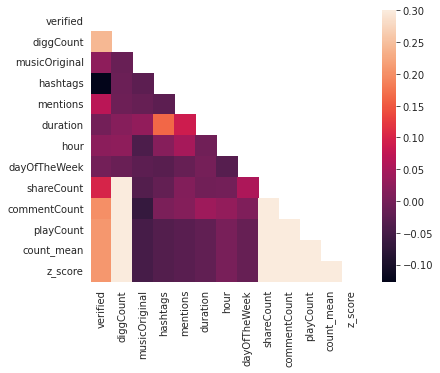

In [33]:
data = pd.read_csv('tik_tok_new_Z.csv')
corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


### Boxplot showing both `Verified/ Not Verified` and Music `original/ Not original` against `Views`

In [35]:
df = pd.read_csv('tik_tok_new.csv')

y = df['playCount']
config = {'displaylogo': False, 'displayModeBar': False}
fig = go.Figure()
fig.add_trace(go.Box(
    x=df['verified'],
    y=y,
    name='verified',
    marker_color='teal'
))
fig.add_trace(go.Box(
    x=df['musicOriginal'],
    y=y,
    name='Music',
    marker_color='orange'
))
fig.update_layout(
    yaxis=dict(title='Views', zeroline=True),
    boxmode='group',
    width =  650,
    height = 650,
    margin_pad = 1,
    showlegend=True,
    hoverlabel_align="left",

    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='white',
    legend_font=dict(
        color = "Dark Grey",
        family = "Courier New",
        size = 11
    ),
    hoverlabel=dict(
        bgcolor = "white",
        font = dict(
            color = "Dark Grey",
            family = "Courier New",
            )    
    )

    
    
)

fig.update_traces(orientation='v')
fig.update_yaxes(
    type="log"
)
fig.show(config=config)


## Scatterplot 

In [36]:
import plotly.express as px
import plotly.graph_objects as go

df_Z = pd.read_csv('tik_tok_new_Z.csv')
config = {'displaylogo': False, 'displayModeBar': False}
fig = px.scatter(df_Z,
                 x="hour",
                 y="dayOfTheWeek",
                 color="verified",
                 size="playCount",
                 opacity=0.8,
                 size_max=40,
                 range_y=(0.5, 7.5),
                 range_x=(-2, 24),
                 color_continuous_scale=px.colors.sequential.Sunsetdark_r,
                 labels = {"verified": "V"})

fig.update_layout(
    xaxis=dict(title='Hour'),
    yaxis=dict(title='Day'),
    width=1000,
    height=700,
    margin_pad=20,
    showlegend=True,
    paper_bgcolor='ghostwhite',
    plot_bgcolor='white',
    coloraxis_colorbar=dict(
        title="Not verified       Verified"
    ),
    coloraxis_showscale=True,
    legend_font=dict(
        color="Dark Grey",
        family="Courier New",
        size=15
    ),
    hoverlabel=dict(
        bgcolor="white",
        bordercolor="Black",
        font=dict(
            color="Dark Grey",
            family="Courier New",
        )



    )

)
fig.update_xaxes(
    layer="above traces",
    showgrid=False,
    zeroline=False,
    ticks="outside", tickwidth=1, tickcolor='Black', ticklen=5,
    ticksuffix=":00"
)
fig.update_yaxes(
    layer="above traces",
    showgrid=False,
    ticks="outside", tickwidth=1, tickcolor='Black', ticklen=5,

    ticktext=["Sunday","Monday", "Tuesday", "Wednesday",
              "Thursday", "Friday", "Saturday"],
    tickvals=[1, 2, 3, 4, 5, 6, 7],

)

fig.update_coloraxes(
    colorbar_len=0.2,
    colorbar_nticks=2,
    colorbar_title_side="right"
)

fig.show(config = config)


In [37]:
import plotly.express as px
df = pd.read_csv("tik_tok_new_Z.csv")
config = {'displaylogo': False, 'displayModeBar': False}
fig = px.histogram(df, x="duration",
                         y="playCount",
                         color="verified", 
                         opacity=0.8,
                         color_discrete_sequence=px.colors.qualitative.Pastel,
                         marginal = "box",
                         orientation = 'v',
                         barmode = 'group'
                         )


fig.update_layout(
    xaxis=dict(title='Duration'),
    yaxis=dict(title='Views'),
    width=650,
    height=650,
    margin_pad=10,
    showlegend=True,
    paper_bgcolor='ghostwhite',
    plot_bgcolor='white',
    legend_font=dict(
        color="Dark Grey",
        family="Courier New",
        size=12
    ),
    hoverlabel=dict(
        bgcolor="white",
        bordercolor="Black",
        font=dict(
            color="Dark Grey",
            family="Courier New",
        )



    )

)
fig.update_xaxes(
    layer="above traces",
    showgrid=False,
    zeroline=False,
    ticks="outside", tickwidth=1, tickcolor='Black', ticklen=5, ticksuffix=" sec")
fig.update_yaxes(
    layer="above traces",
    showgrid=False,
    ticks="outside", tickwidth=1, tickcolor='Black', ticklen=5)



fig.show(config=config)